In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
np.random.seed(42)

In [3]:
import os

if not os.path.exists('./figures'):
    os.makedirs('figures')

In [4]:
from pathlib import Path
path_styles = Path('../styles')

def styles(paths):
    paths = [paths] if not isinstance(paths, list) else paths
    return [path_styles/f"{path}.mlpstyle" for path in paths]

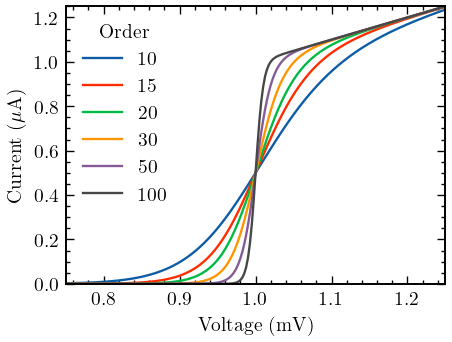

In [5]:
def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

x = np.linspace(0.75, 1.25, 201)

with plt.style.context(styles(['science_tex'])):
        
    fig, ax = plt.subplots()

    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)

    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set_xlabel('Voltage (mV)')
    ax.set_ylabel(r'Current ($\mu$A)')

    ax.set_yticks(np.linspace(0, 1.2, 7))
    ax.set_xticks(np.linspace(0.8, 1.2, 5))
    fig.savefig('figures/sciencePlots.jpg', dpi=900)
    plt.show()

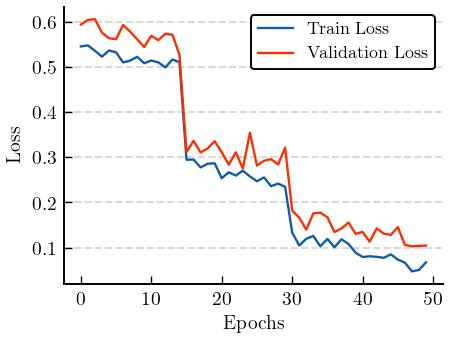

In [6]:
np.random.seed(42)
epochs = 50

# Generating initial losses with slowly decreasing lines and small noise
train_loss = np.linspace(0.55, 0.35, epochs) - np.random.normal(0, 0.01, epochs)
val_loss = np.linspace(0.6, 0.4, epochs) - np.random.normal(0, 0.02, epochs)

# Reducing values at specific epochs
train_loss[15:30] -= 0.2
train_loss[30:] -= 0.3

val_loss[15:30] -= 0.2
val_loss[30:] -= 0.3

with plt.style.context(styles('minimal_tex')):

    plt.plot(np.arange(epochs), train_loss, label='Train Loss')
    plt.plot(np.arange(epochs), val_loss, label='Validation Loss')
    plt.grid(axis='y')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize=9, frameon=True)
    plt.savefig('figures/loss.jpg', dpi=900)
    plt.show()

https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/matplotlib_essentials.ipynb

In [7]:
n_samples = 1000

res_a1 = 0.2  * np.random.randn(n_samples) + 0.4
res_b1 = 0.25 * np.random.randn(n_samples) + 0.4
res_a2 = 0.21 * np.random.randn(n_samples) + 0.3
res_b2 = 0.22 * np.random.randn(n_samples) + 0.3

In [8]:
# This version does not align the equations
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

# This DOES ([-5pt] is to reduce the gap between lines)
textstr1 = r'$\begin{aligned} \sigma_a=%.4f \\[-5pt] \sigma_b=%.4f \end{aligned}$' \
           % (np.std(res_a1), np.std(res_b1))

textstr2 = r'$\begin{aligned} \sigma_a=%.4f \\[-5pt] \sigma_b=%.4f \end{aligned}$' \
           % (np.std(res_a2), np.std(res_b2))

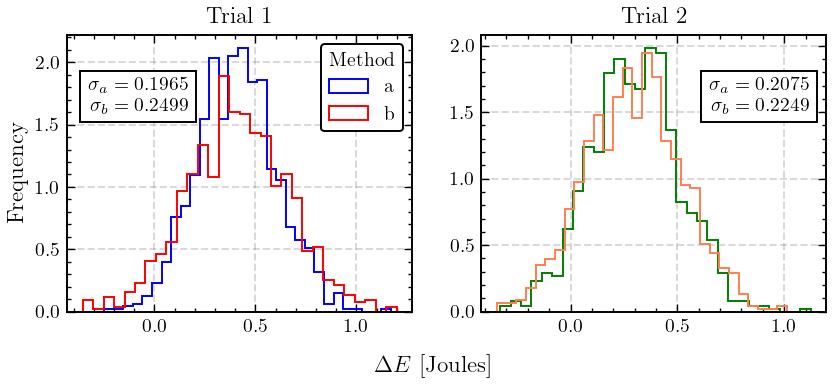

In [9]:
with plt.style.context(styles(['science_tex'])):
    
    fig, axes = plt.subplots(1, 2, figsize=(7, 2.62))
    
    ax = axes[0]
    ax.hist(res_a1, bins=30, density=True, histtype='step', label='a', color='blue')
    ax.hist(res_b1, bins=30, density=True, histtype='step', label='b', color='red')
    ax.text(0.06, 0.76, textstr1, transform=ax.transAxes,
           bbox=dict(facecolor='white', edgecolor='black'))

    ax.legend(title='Method', frameon=True)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('Trial 1')
    ax.grid()
    
    ax = axes[1]
    ax.hist(res_a2, bins=30, density=True, histtype='step', label='Method 1', color='green')
    ax.hist(res_b2, bins=30, density=True, histtype='step', label='Method 2', color='coral')
    ax.text(0.66, 0.76, textstr2, transform=ax.transAxes,
           bbox=dict(facecolor='white', edgecolor='black'))
    ax.set_title('Trial 2')
    ax.grid()
    
    fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha='center', size=12)
    
    plt.savefig('figures/trial.jpg', dpi=900)
    plt.show()

In [10]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

x_fit = np.linspace(0, 15, 100)
y_fit = np.sin(x_fit)

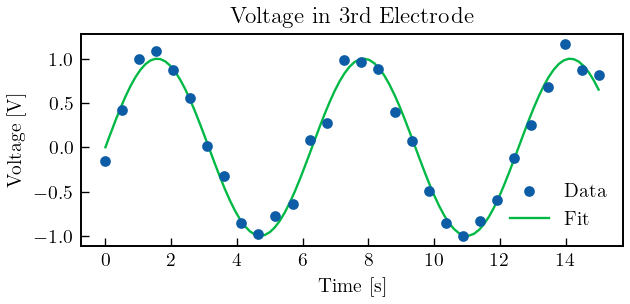

In [11]:
with plt.style.context(styles(['clasic_tex'])):
    plt.figure(figsize=(5, 2))
    plt.plot(x, y, 'o', label='Data', zorder=100, markersize=4.5)
    plt.plot(x_fit, y_fit, label='Fit', c='#00B945')
    
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.title('Voltage in 3rd Electrode')
    plt.legend(loc='lower right')
    plt.savefig('figures/sine.jpg', dpi=900)
    plt.show()